In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [4]:
df = pd.read_csv('./movie_metadata.csv', parse_dates=True)

In [5]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
df.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [8]:
df.country.unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [9]:
df.aspect_ratio.unique()

array([ 1.78,  2.35,   nan,  1.85,  2.  ,  2.2 ,  2.39,  2.24,  1.33,
        4.  ,  1.66,  1.5 , 16.  ,  1.77,  2.4 ,  1.37,  2.76,  1.18,
        1.44,  2.55,  1.2 ,  1.75,  1.89])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [11]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [12]:
'''
Existe relación entre los likes de Facebook de los directores y su recaudación?
Relación entre la recaudación y la duración de la película.
Relación entre los likes de la película y el score de Imdb.
movie_facebook_likes, director_name, gross, director_facebook_likes
'''

'\nExiste relación entre los likes de Facebook de los directores y su recaudación?\nRelación entre la recaudación y la duración de la película.\nRelación entre los likes de la película y el score de Imdb.\nmovie_facebook_likes, director_name, gross, director_facebook_likes\n'

In [13]:
df.loc[(df.director_facebook_likes > 100),['director_facebook_likes', 'gross']].corr()

,director_facebook_likes,gross
director_facebook_likes,1.00000,0.16739
gross,0.16739,1.00000


In [14]:
df.loc[:,['director_name','director_facebook_likes']]

,director_name,director_facebook_likes
0,James Cameron,0.0
1,Gore Verbinski,563.0
2,Sam Mendes,0.0
3,Christopher Nolan,22000.0
4,Doug Walker,131.0
5,Andrew Stanton,475.0
6,Sam Raimi,0.0
7,Nathan Greno,15.0
8,Joss Whedon,0.0
9,David Yates,282.0


In [15]:
df.duration.describe()

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [16]:
df.gross.describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

In [17]:
def getGrossByDuration(df, duration_1, duration_2):
    return int(df.loc[(df.duration > duration_1) & (df.duration < duration_2), ['gross']].mean())

getGrossByDuration(df, 0, 90)

31828485

In [18]:
getGrossByDuration(df, 90, 120)

40707511

In [19]:
getGrossByDuration(df, 120, 360)

79681409

In [20]:
getGrossByDuration(df, 80, 160)

47091817

In [21]:
df.loc[:,['duration', 'gross']].corr()

,duration,gross
duration,1.000000,0.250298
gross,0.250298,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb83521b9e8>]],
      dtype=object)

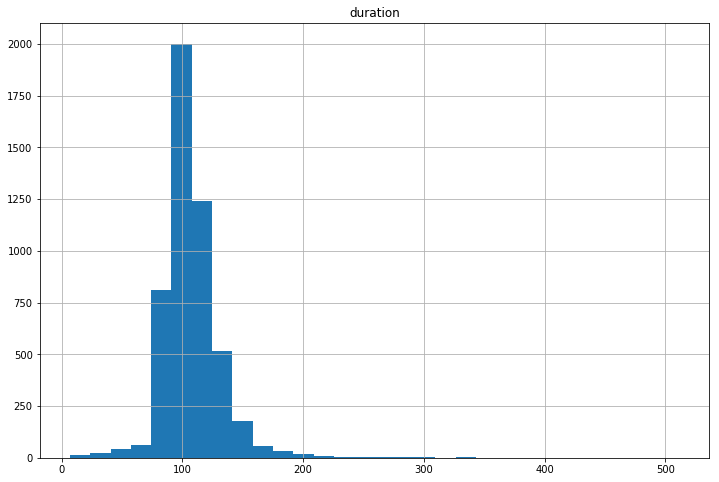

In [22]:
pd.DataFrame.hist(data = df, column=['duration'], bins=30)

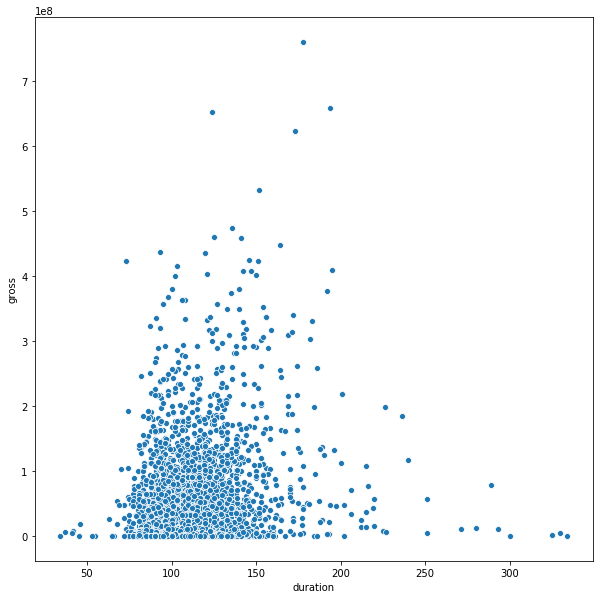

In [23]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=df.duration, y=df.gross, ax=ax);

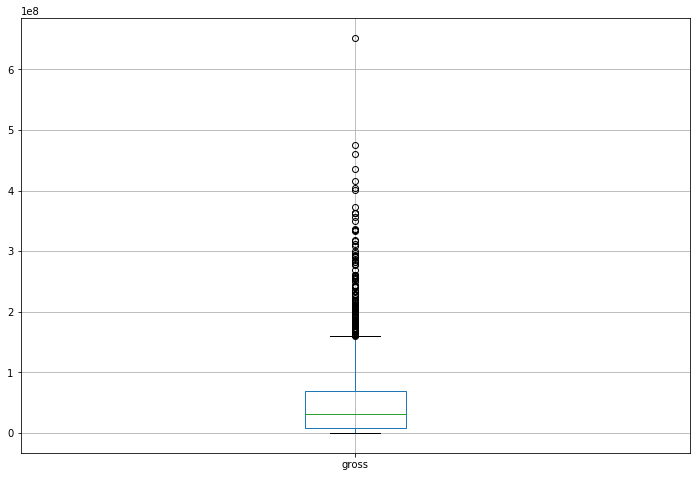

In [24]:
def getGrossByDuration2(df, duration_1, duration_2):
    return df.loc[(df.duration > duration_1) & (df.duration < duration_2), ['gross']]


#grossByDuration = pd.DataFrame(data={'durations' : [90], 'data' : [getGrossByDuration2(df,0,90)]})

#getGrossByDuration2(df,0,90).boxplot()

getGrossByDuration2(df,100,140).boxplot()


In [25]:
df.loc[:,['movie_facebook_likes', 'imdb_score']].corr()

,movie_facebook_likes,imdb_score
movie_facebook_likes,1.000000,0.247049
imdb_score,0.247049,1.000000


In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.drop('Id', axis=1), diag_kind='kde', hue="Species", palette="husl")

NameError: name 'data' is not defined

In [41]:
df.loc[:,['duration','imdb_score']].corr()

,duration,imdb_score
duration,1.000000,0.261662
imdb_score,0.261662,1.000000


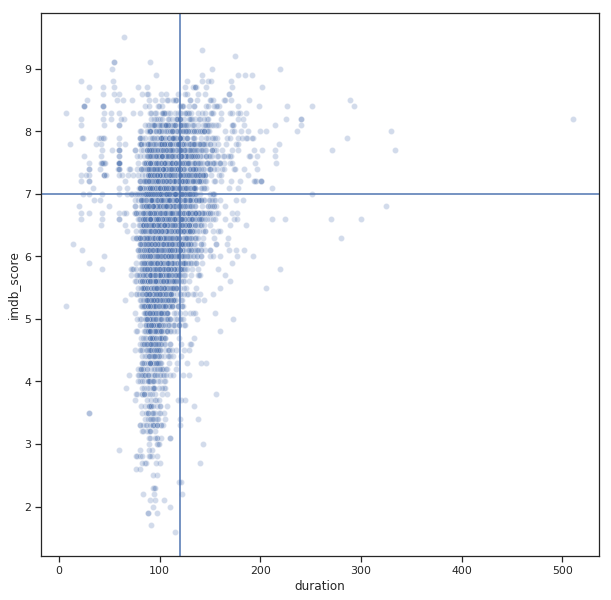

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=df.duration, y=df.imdb_score, ax=ax, alpha=0.25);
plt.axvline(x=120)
plt.axhline(y=7)

In [31]:
df.duration.describe()

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [35]:
df.loc[(df.duration > 120),['imdb_score']].mean()

imdb_score    7.05492
dtype: float64

In [36]:
df.loc[(df.duration < 120),['imdb_score']].mean()

imdb_score    6.264821
dtype: float64

In [77]:
directors = df.director_name.unique() 
movies = []
score = []

for director in directors:
    directorMovies = df.loc[(df.director_name == director)]
    movies.append(len(directorMovies))
    score.append(directorMovies.imdb_score.mean())
    
results = pd.DataFrame(data={
    'director' : directors, 
    'movies' : movies,
    'score' : score
})

results.loc[(results.movies >= 5)].sort_values(by='score', ascending = False)

,director,movies,score
3,Christopher Nolan,8,8.425000
169,Quentin Tarantino,8,8.200000
1784,Frank Capra,5,8.060000
328,Stanley Kubrick,7,8.000000
0,James Cameron,7,7.914286
114,Alejandro G. Iñárritu,6,7.783333
1568,Fred Zinnemann,5,7.760000
68,David Fincher,10,7.750000
16,Peter Jackson,12,7.675000
48,Martin Scorsese,20,7.660000


In [76]:
years = df.title_year.unique() 
movies = []
score = []

for year in years:
    yearMovies = df.loc[(df.title_year == year)]
    movies.append(len(yearMovies))
    score.append(yearMovies.imdb_score.mean())
    
results = pd.DataFrame(data={
    'year' : years, 
    'movies' : movies,
    'score' : score
})

results.sort_values(by='year', ascending = True)

,year,movies,score
88,1916.0,1,8.000000
91,1920.0,1,4.800000
90,1925.0,1,8.300000
54,1927.0,1,8.300000
85,1929.0,2,7.150000
70,1930.0,1,7.800000
65,1932.0,1,6.600000
87,1933.0,2,7.100000
89,1934.0,1,8.200000
86,1935.0,1,7.800000


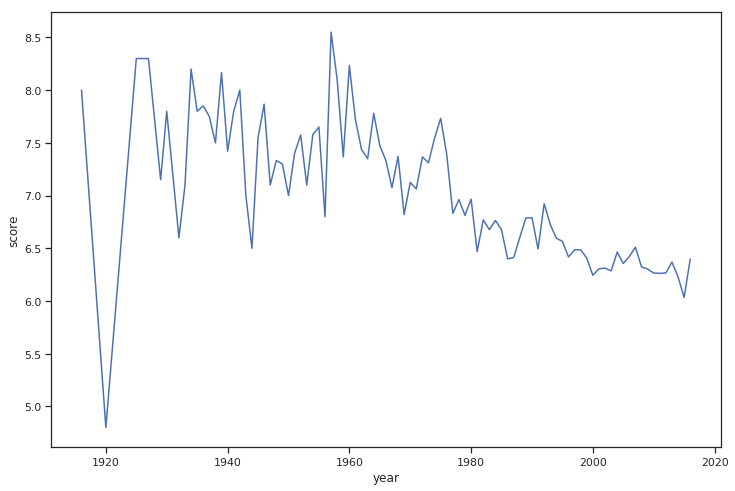

In [75]:
sns.lineplot(x=results.year, y=results.score, palette="deep")

In [97]:
data = df.groupby('title_year')['imdb_score'].agg(['mean','count']).reset_index()
data.head()

,title_year,mean,count
0,1916.0,8.00,1
1,1920.0,4.80,1
2,1925.0,8.30,1
3,1927.0,8.30,1
4,1929.0,7.15,2


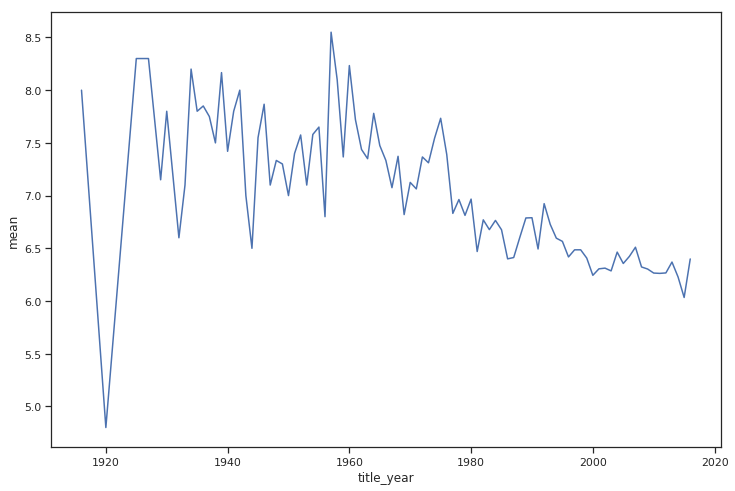

In [99]:
sns.lineplot(x='title_year', y='mean', data = data)

In [156]:
dupla1 = df[['director_name', 'actor_1_name','imdb_score']]
dupla2 = df[['director_name', 'actor_2_name','imdb_score']]
dupla3 = df[['director_name', 'actor_3_name','imdb_score']]

dupla1.columns = ['director_name', 'actor','imdb_score']
dupla2.columns = ['director_name', 'actor','imdb_score']
dupla3.columns = ['director_name', 'actor','imdb_score']


duplas = pd.concat([dupla1, dupla2, dupla3])

duplas.head()

,director_name,actor,imdb_score
0,James Cameron,CCH Pounder,7.9
1,Gore Verbinski,Johnny Depp,7.1
2,Sam Mendes,Christoph Waltz,6.8
3,Christopher Nolan,Tom Hardy,8.5
4,Doug Walker,Doug Walker,7.1


In [163]:
duplasGroup = duplas.groupby(['director_name','actor'])['imdb_score'].agg(['mean','count']).sort_values(by='mean', ascending = False)

duplasGroup.loc[duplasGroup['count'] > 2]

mean  count
director_name        actor                              
Francis Ford Coppola Robert Duvall       8.900000      3
Peter Jackson        Billy Boyd          8.800000      3
                     Orlando Bloom       8.800000      3
Francis Ford Coppola Al Pacino           8.600000      3
Christopher Nolan    Christian Bale      8.575000      4
David Fincher        Brad Pitt           8.400000      3
Guy Ritchie          Jason Flemyng       8.266667      3
                     Jason Statham       8.266667      3
Frank Capra          Thomas Mitchell     8.033333      3
James Cameron        Michael Biehn       8.033333      3
Frank Darabont       Jeffrey DeMunn      7.975000      4
Martin Scorsese      Leonardo DiCaprio   7.960000      5
Clint Eastwood       Morgan Freeman      7.933333      3
John Carpenter       P.J. Soles          7.900000      3
Robert Zemeckis      Thomas F. Wilson    7.900000      3
Joss Whedon          Robert Downey Jr.   7.900000      3
Robert Zemeckis      Lea Thompson        7.900000      3
Joss Whedon          Chris Hemsworth     7.900000      3
                     Scarlett Johansson  7.900000      3
Steven Spielberg     Tom Hanks           7.875000      4
Martin Scorsese      Robert De Niro      7.842857      7
Darren Aronofsky     Mark Margolis       7.820000      5
Peter Jackson        Aidan Turner        7.766667      3
                     James Nesbitt       7.766667      3
                     Adam Brown          7.766667      3
William Friedkin     Roy Scheider        7.766667      3
John Carpenter       Donald Pleasence    7.725000      4
Wes Anderson         Bill Murray         7.716667      6
Robert Zemeckis      Tom Hanks           7.700000      3
Kenneth Branagh      Brian Blessed       7.675000      4
...                                           ...    ...
Barry Sonnenfeld     Will Smith          6.250000      4
Darren Lynn Bousman  Shawnee Smith       6.233333      3
Yimou Zhang          Ni Yan              6.233333      3
Timur Bekmambetov    Morgan Freeman      6.225000      4
Shawn Levy           Rami Malek          6.166667      3
                     Robin Williams      6.166667      3
                     Steve Coogan        6.166667      3
Steven Soderbergh    Julia Roberts       6.133333      3
Timur Bekmambetov    Ayelet Zurer        6.066667      3
                     Moises Arias        6.066667      3
Garry Marshall       Hector Elizondo     6.040000      5
Paul McGuigan        Spencer Wilding     6.000000      3
                     Daniel Radcliffe    6.000000      3
                     Daniel Mays         6.000000      3
Rob Zombie           Sid Haig            6.000000      3
Frank Coraci         Adam Sandler        5.975000      4
Louis Leterrier      Jason Flemyng       5.966667      3
Paul W.S. Anderson   Milla Jovovich      5.950000      4
Dennis Dugan         Steve Buscemi       5.933333      3
Garry Marshall       Anne Hathaway       5.866667      3
Jonathan Liebesman   Noel Fisher         5.866667      3
Joe Wright           Cara Delevingne     5.800000      3
                     Hugh Jackman        5.800000      3
                     Nonso Anozie        5.800000      3
Dennis Dugan         Adam Sandler        5.728571      7
George A. Romero     Shawn Roberts       5.633333      3
Kenny Ortega         Corbin Bleu         4.833333      3
                     Lucas Grabeel       4.833333      3
Robert Rodriguez     Alexa PenaVega      4.760000      5
Jason Friedberg      Carmen Electra      2.300000      3

[149 rows x 2 columns]